# Application of Poisson and Helmholtz operators

In [4]:
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
from vampyr import vampyr3d as vp

from plotter import grid_plotter

MRA = vp.MultiResolutionAnalysis(box=[-16, 16], order=6)

prec = 1.0e-5
P_eps = vp.ScalingProjector(MRA, prec)

mu = 1.0
H = vp.HelmholtzOperator(MRA, mu, prec)
P = vp.PoissonOperator(MRA, prec)

def slater_function(x):
    center = np.array([0.1, 0.2, 0.3])
    r = np.linalg.norm(np.array(x) - center)  # Calculate the distance from center
    return np.exp(- 50.0 * np.abs(r))  # Return the Slater function value

def unit_charge_gaussian(x,b):
    a = (b/np.pi)**(3./2.)
    center = np.array([0.1, 0.2, 0.3])
    r = np.linalg.norm(np.array(x) - center)
    val = a * np.exp(-b * r**2)
    return val

wide_charge = lambda x: unit_charge_gaussian(x,10)
narrow_charge = lambda x: unit_charge_gaussian(x,50)

center = [0.1, 0.2, 0.3]
power = [0, 0, 0]

b = 10.0
a = (b/np.pi)**(3./2.)
wideG = vp.GaussFunc(b, a, center, power)

b = 10.0
a = (b/np.pi)**(3./2.)
narrowG = vp.GaussFunc(b, a, center, power)

wide_charge_tree = P_eps(wideG)
narrow_charge_tree = P_eps(narrowG)
#slater_tree = P_eps(slater_function)
P_wide_tree = 4 * np.pi * P(wide_charge_tree)
P_narrow_tree = 4 * np.pi * P(narrow_charge_tree)
#H_slater_tree = 4 * np.pi * H(slater_tree)
print(wide_charge_tree.integrate()) # check if the total chatge integrates to 1
print(narrow_charge_tree.integrate()) # check if the total chatge integrates to 1

0.9999999999997281
0.9999999999997281


Narrow Gaussian
Wide Gaussian


(<Figure size 900x900 with 1 Axes>, <Axes3DSubplot:>)

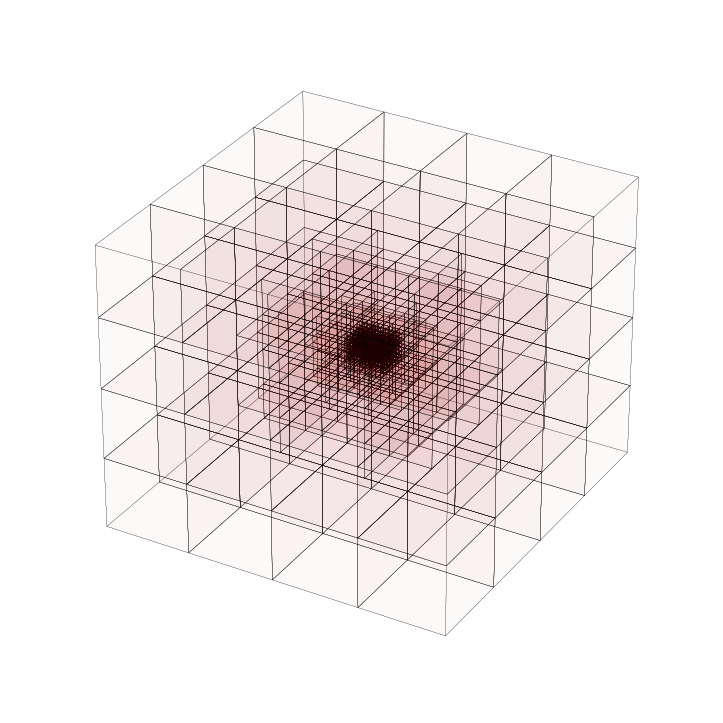

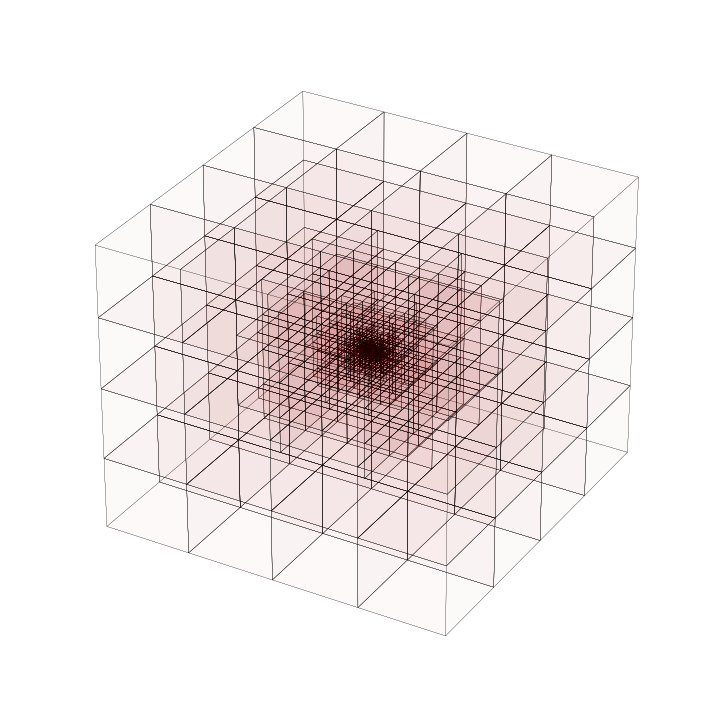

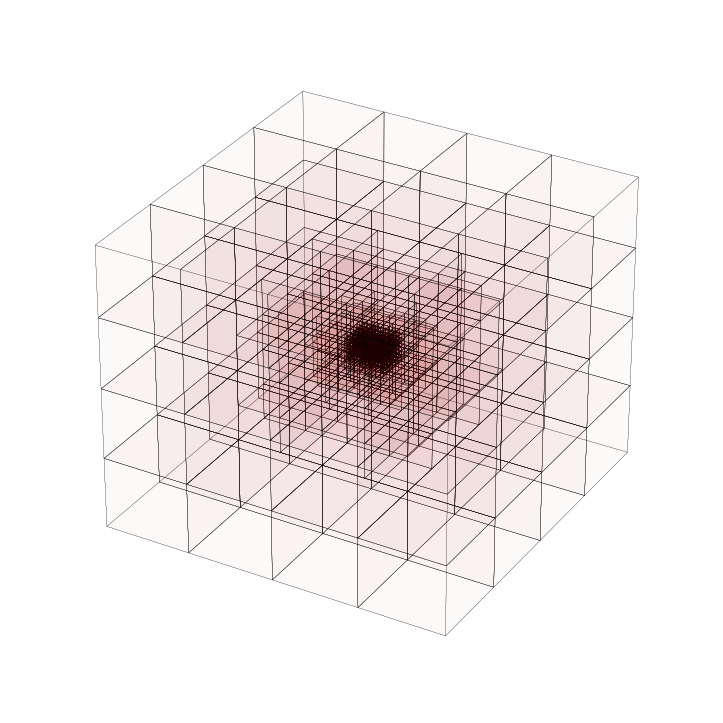

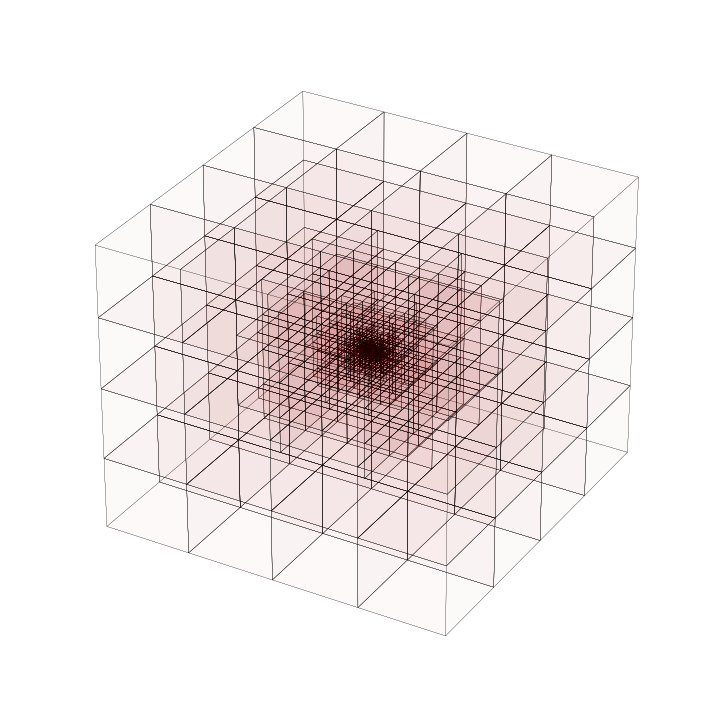

In [5]:
from plotter import grid_plotter
print("Narrow Gaussian")
grid_plotter(narrow_charge_tree)
grid_plotter(P_narrow_tree)
print("Wide Gaussian")
grid_plotter(wide_charge_tree)
grid_plotter(P_wide_tree)

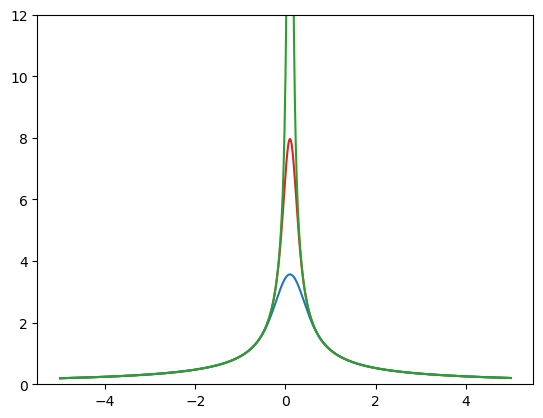

In [61]:
import matplotlib.pyplot as plt

def pot_point_charge(x):
    center = np.array([0.1, 0.2, 0.3])
    r = np.linalg.norm(np.array(x) - center)
    val = 1 / r
    return val

x_vec = np.linspace(-5,5,1001)
y1_vec = np.array([P_narrow_tree([x,0.2,0.3]) for x in x_vec ])
y2_vec = np.array([P_wide_tree([x,0.2,0.3]) for x in x_vec ])
y3_vec = np.array([pot_point_charge([x,0.2,0.3]) for x in x_vec ])
plt.plot(x_vec, y1_vec, "tab:red") # potential from narrow Gaussian
plt.plot(x_vec, y2_vec, "tab:blue") # potential from wide Gaussian
plt.plot(x_vec, y3_vec, "tab:green") # point charge potential
plt.ylim(0.0,12.0)
plt.show()

[-5.   -4.99 -4.98 ...  4.98  4.99  5.  ]


In [63]:
help(vp.Gaussian)

Help on class Gaussian in module vampyr._vampyr.vampyr3d:

class Gaussian(RepresentableFunction)
 |  Method resolution order:
 |      Gaussian
 |      RepresentableFunction
 |      pybind11_builtins.pybind11_object
 |      builtins.object
 |  
 |  Methods defined here:
 |  
 |  __init__(...)
 |      __init__(self: vampyr._vampyr.vampyr3d.Gaussian, arg0: float, arg1: float, arg2: List[float[3]], arg3: List[int[3]]) -> None
 |  
 |  __str__(...)
 |      __str__(self: vampyr._vampyr.vampyr3d.Gaussian) -> str
 |  
 |  coef(...)
 |      coef(self: vampyr._vampyr.vampyr3d.Gaussian) -> float
 |  
 |  exp(...)
 |      exp(self: vampyr._vampyr.vampyr3d.Gaussian, dim: int = 0) -> float
 |  
 |  overlap(...)
 |      overlap(self: vampyr._vampyr.vampyr3d.Gaussian, inp: vampyr._vampyr.vampyr3d.Gaussian) -> float
 |  
 |  periodify(...)
 |      periodify(self: vampyr._vampyr.vampyr3d.Gaussian, period: List[float[3]], std_dev: float = 4.0) -> mrcpp::GaussExp<3>
 |  
 |  pos(...)
 |      pos(self: vam